In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Obtención de datos

In [2]:
# Cambiar según dónde tengan el set de datos
from google.colab import drive
drive.mount("/content/drive")
df=pd.read_csv('/content/drive/MyDrive/DSA/Datos/Churn/Clientes Bank/BankChurners.csv')

Mounted at /content/drive


In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
df = df.drop(['CLIENTNUM'], axis = 1)

## Analisis Exploratorio

In [5]:
df.shape

(10127, 20)

In [6]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [7]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

### Variables categoricas

In [8]:
df.select_dtypes(['object']).columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [9]:
for col in df.select_dtypes(['object']).columns:
  print(col, '\n')
  print('Cantidad de valores unicos: ', df[col].nunique())
  if df[col].nunique()<15:
    print(df[col].value_counts())
  print('----------------\n')

Attrition_Flag 

Cantidad de valores unicos:  2
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------

Gender 

Cantidad de valores unicos:  2
F    5358
M    4769
Name: Gender, dtype: int64
----------------

Education_Level 

Cantidad de valores unicos:  7
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------

Marital_Status 

Cantidad de valores unicos:  4
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
----------------

Income_Category 

Cantidad de valores unicos:  6
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
----------------

Card_Category 

Cantidad de valores unicos:  4
Blue        9436
Silver     

### Variables numericas

In [10]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


### Gráficos

Para cada atributo:

* Analizar su distribución.
* Analizar si existen valores nulos y decidir qué hacer con ellos.
* Analizar si existen outliers y decidir que hacer con ellos.


**Total_Trans_Ct**

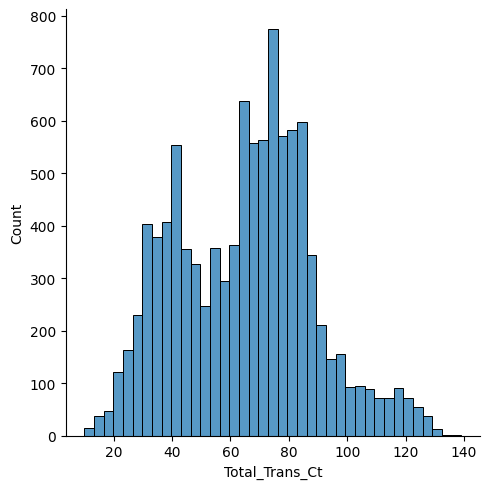

In [11]:
sns.displot(df.Total_Trans_Ct)

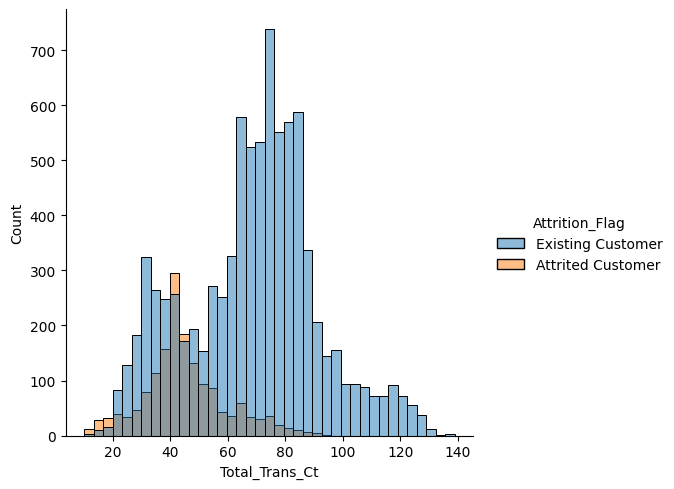

In [12]:
sns.displot(data = df,
           x = df.Total_Trans_Ct,
           hue = df.Attrition_Flag)

**Income_Category**

In [13]:
df.Income_Category = df.Income_Category.replace('Unknown', np.nan)

In [14]:
df.Income_Category.isnull().sum()

1112

In [15]:
df.Income_Category.value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

In [16]:
def imputar_sampleo(x):
    import random
    if pd.isnull(x):
        res = np.random.choice(df[df.Income_Category.notnull()]['Income_Category'])
    else:
        res = x
    return res

In [17]:
df['Income_Category'] = df['Income_Category'].apply(imputar_sampleo)

In [18]:
df['Income_Category'].value_counts()

Less than $40K    4021
$40K - $60K       2014
$80K - $120K      1723
$60K - $80K       1567
$120K +            802
Name: Income_Category, dtype: int64

### Correlacion

In [19]:
df.Attrition_Flag=df.Attrition_Flag.replace({'Existing Customer':1, 'Attrited Customer':0 })

In [20]:
df.corr()

<ipython-input-20-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,1.000000,-0.018203,-0.018991,-0.013687,0.150005,-0.152449,-0.204491,0.023873,0.263053,0.000285,0.131063,0.168598,0.371403,0.290054,0.178410
Customer_Age,-0.018203,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,-0.018991,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,-0.013687,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.150005,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,-0.152449,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,-0.204491,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.023873,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.263053,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.000285,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


<ipython-input-21-77c954995721>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

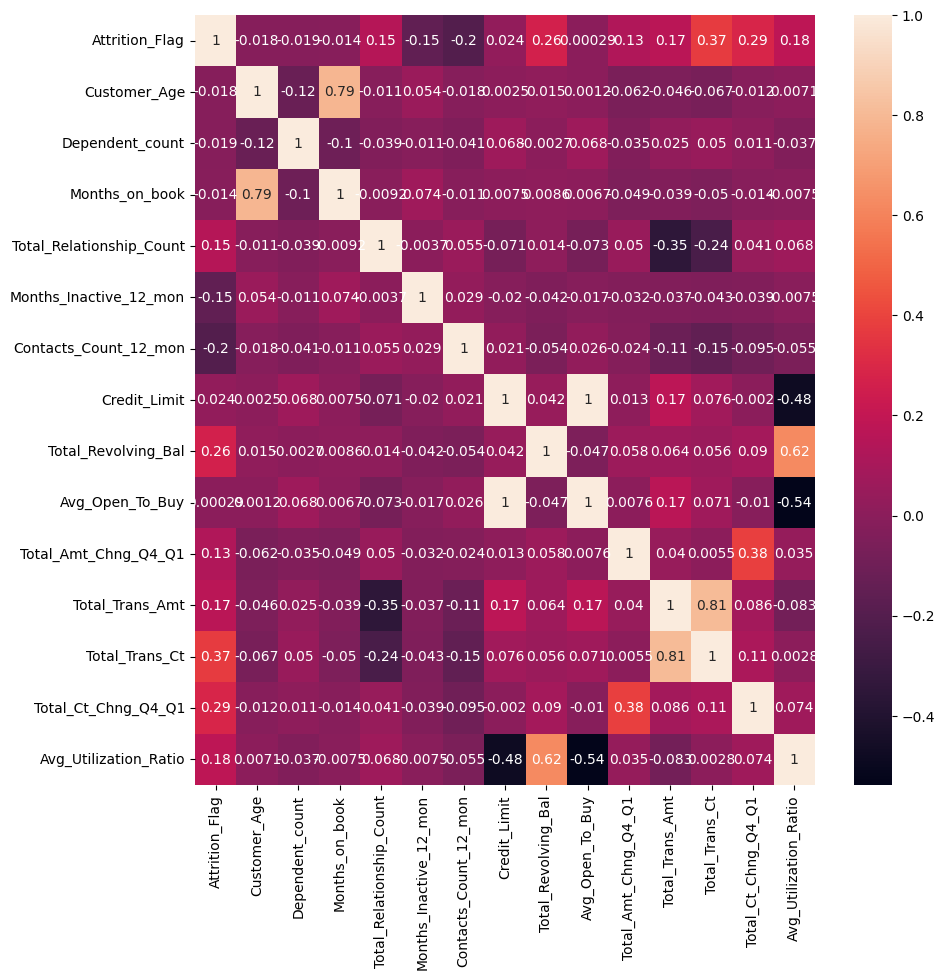

In [21]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),
           annot = True)

### Transformar variables categoricas

In [22]:
df.select_dtypes(['object'])

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue
2,M,Graduate,Married,$80K - $120K,Blue
3,F,High School,Unknown,Less than $40K,Blue
4,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...
10122,M,Graduate,Single,$40K - $60K,Blue
10123,M,Unknown,Divorced,$40K - $60K,Blue
10124,F,High School,Married,Less than $40K,Blue
10125,M,Graduate,Unknown,$40K - $60K,Blue


One Hot Encoder

In [23]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [24]:
enc = OneHotEncoder()
enc.fit_transform(df[['Gender']]).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

Ordinal Encoder

In [25]:
df["Income_Category"].value_counts().index

Index(['Less than $40K', '$40K - $60K', '$80K - $120K', '$60K - $80K',
       '$120K +'],
      dtype='object')

In [26]:
enc2 = OrdinalEncoder()
enc2.fit_transform(df[['Income_Category']])

array([[2.],
       [4.],
       [3.],
       ...,
       [4.],
       [1.],
       [4.]])

Mapear

In [27]:
mapper = {'Less than $40K':1 ,  '$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4,  '$120K +':5}

In [28]:
df['Income_Category'].replace(mapper)

0        3
1        1
2        4
3        1
4        3
        ..
10122    2
10123    2
10124    1
10125    2
10126    1
Name: Income_Category, Length: 10127, dtype: int64

In [29]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Pipelines

### Dividir set de entrenemiento y test

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [32]:
X=df.iloc[:,1:]
y=df.Attrition_Flag

In [33]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=33)

## Crear pipelines

In [34]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

Crear un preprocesador de columnas

In [35]:
preproccesor = make_column_transformer(
    (OneHotEncoder(), ['Gender','Card_Category']),
    (OrdinalEncoder(), ['Income_Category']),
    (SimpleImputer(missing_values = np.nan, strategy = 'mean'),['Total_Trans_Ct'])
)

In [36]:
preproccesor.fit_transform(X_train)

array([[  1.,   0.,   1., ...,   0.,   4.,  58.],
       [  0.,   1.,   1., ...,   0.,   2.,  77.],
       [  1.,   0.,   1., ...,   0.,   1., 104.],
       ...,
       [  1.,   0.,   1., ...,   0.,   4.,  75.],
       [  1.,   0.,   1., ...,   0.,   1.,  41.],
       [  1.,   0.,   1., ...,   0.,   4.,  71.]])

In [37]:
X_train_transform = pd.DataFrame(preproccesor.fit_transform(X_train))

## Entrenar modelo

Árbol de decisión

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Crear árbol de decisión

In [39]:
model_tree = DecisionTreeClassifier()

In [40]:
X_train_transform

,0,1,2,3,4,5,6,7
0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,58.0
1,0.0,1.0,1.0,0.0,0.0,0.0,2.0,77.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,104.0
3,0.0,1.0,1.0,0.0,0.0,0.0,3.0,33.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,62.0
...,...,...,...,...,...,...,...,...
7083,0.0,1.0,1.0,0.0,0.0,0.0,1.0,29.0
7084,1.0,0.0,1.0,0.0,0.0,0.0,4.0,26.0
7085,1.0,0.0,1.0,0.0,0.0,0.0,4.0,75.0
7086,1.0,0.0,1.0,0.0,0.0,0.0,1.0,41.0


Entrenar

In [41]:
model_tree.fit(X_train_transform,y_train)

DecisionTreeClassifier()

Score

In [42]:
model_tree.score(X_train_transform,y_train)

0.8802200902934537

Gráfico

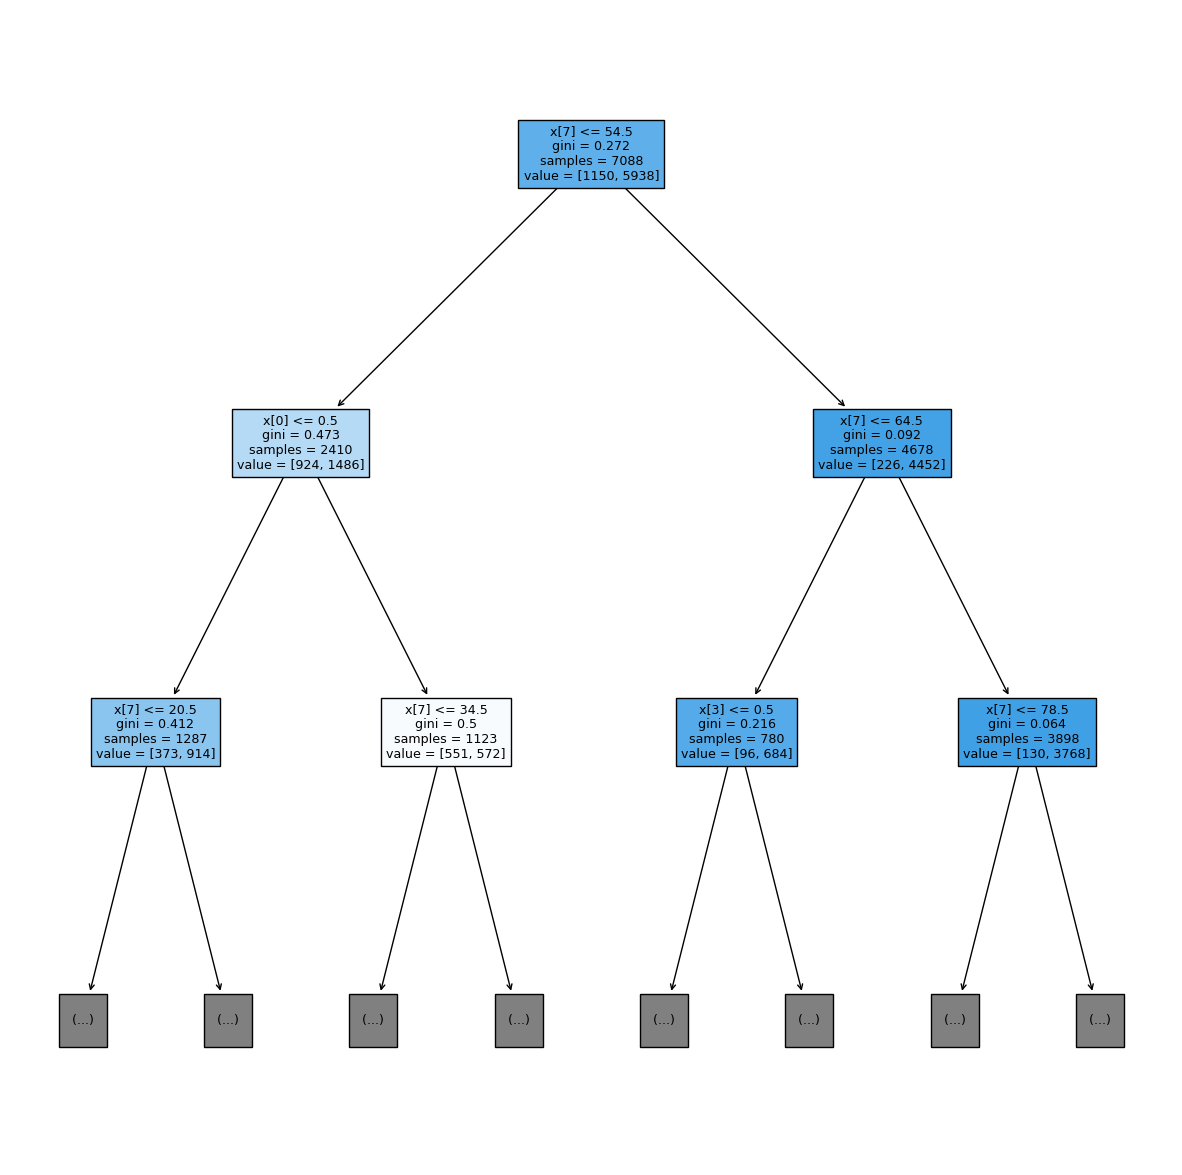

In [43]:
plt.figure(figsize = (15,15))
_= tree.plot_tree(model_tree, filled = True, max_depth = 2)

Evaluar performance en set de testing. Primero debemos transformar las columnas y luego predecir

In [44]:
X_test.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9616,47,F,2,High School,Married,$40K - $60K,Blue,40,2,1,3,4074.0,1868,2206.0,0.688,15005,118,0.761,0.459
7865,53,M,3,Uneducated,Married,$120K +,Blue,36,2,2,0,3742.0,1454,2288.0,0.894,5326,62,0.676,0.389
73,42,M,5,Uneducated,Married,$80K - $120K,Blue,37,6,2,2,22913.0,1528,21385.0,0.414,1394,35,0.522,0.067
596,55,M,3,Uneducated,Married,$60K - $80K,Blue,44,3,2,2,2323.0,0,2323.0,0.737,804,15,0.500,0.000
114,48,M,3,Graduate,Single,$80K - $120K,Blue,35,6,1,0,13551.0,1294,12257.0,0.791,1388,37,1.056,0.095


In [45]:
X_test_transform = pd.DataFrame(preproccesor.fit_transform(X_test))

In [46]:
X_test_transform

,0,1,2,3,4,5,6,7
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,118.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,62.0
2,0.0,1.0,1.0,0.0,0.0,0.0,3.0,35.0
3,0.0,1.0,1.0,0.0,0.0,0.0,2.0,15.0
4,0.0,1.0,1.0,0.0,0.0,0.0,3.0,37.0
...,...,...,...,...,...,...,...,...
3034,1.0,0.0,1.0,0.0,0.0,0.0,4.0,72.0
3035,1.0,0.0,1.0,0.0,0.0,0.0,1.0,27.0
3036,1.0,0.0,1.0,0.0,0.0,0.0,4.0,72.0
3037,1.0,0.0,1.0,0.0,0.0,0.0,1.0,90.0


In [47]:
y_pred = model_tree.predict(X_test_transform)

Métricas

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 212,  265],
       [ 225, 2337]])

In [49]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.8387627509049029
Precision Score : 0.8981552651806303
Recall Score : 0.9121779859484778
F1 Score : 0.905112316034082


##  Pipeline de entrenamiento

In [50]:
from sklearn.pipeline import make_pipeline

Crear Pipeline

In [51]:
modeler = make_pipeline(preproccesor,
                        DecisionTreeClassifier())

Entrenar Pipeline

In [52]:
modeler.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Gender', 'Card_Category']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['Income_Category']),
                                                 ('simpleimputer',
                                                  SimpleImputer(),
                                                  ['Total_Trans_Ct'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

Evaluar score de pipeline con datos de entrenamiento

In [53]:
modeler.score(X_train, y_train)

0.8802200902934537

Evaluar score con datos de test

In [54]:
modeler.score(X_test, y_test)

0.8390918065153011

Reportar matrix de confusion

In [55]:
y_pred=modeler.predict(X_test)

In [56]:
confusion_matrix(y_test, y_pred)

array([[ 212,  265],
       [ 224, 2338]])

## Hiper parametros

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
params={'decisiontreeclassifier__criterion': ['gini', 'entropy'],
       'decisiontreeclassifier__max_depth':[2,3,4,5, 6, 7, 10]}

grid = GridSearchCV(modeler,  param_grid=params )
grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['Gender',
                                                                          'Card_Category']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(),
                                                                         ['Income_Category']),
                                                                        ('simpleimputer',
                                                                         SimpleImputer(),
                                                                         ['Total_Trans_Ct'])])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [2, 3, 4, 5, 6, 7,
                                                               10]})

In [59]:
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)

Best parameter (CV score=0.857):
{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 4}


## Varios modelos

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
models = [DecisionTreeClassifier(),
           KNeighborsClassifier()
          ]

In [62]:
for mod in models:
    modeler2 = make_pipeline(preproccesor,mod)
    modeler2.fit(X_train,y_train)
    y_pred = modeler2.predict(X_test)
    print(mod, '\n')
    print('Accuracy' , modeler2.score(X_test,y_test))
    print(confusion_matrix(y_test, y_pred) , '\n')

DecisionTreeClassifier() 

Accuracy 0.8384336952945047
[[ 212  265]
 [ 226 2336]] 

KNeighborsClassifier() 

Accuracy 0.8427114182296808
[[ 185  292]
 [ 186 2376]] 



## Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
random_model = RandomForestClassifier(n_estimators = 5)

In [67]:
random_model.fit(X_train_transform , y_train)

RandomForestClassifier(n_estimators=5)

In [68]:
random_model.score(X_train_transform, y_train)

0.8758465011286681